## JSON and Database Access
* Handling JSON
* Accessing SQL Databases
* Accessing NoSQL Databases

### http://dreamai.io/files/m1u2/nb4-jsonda.zip

### JSON
Consists of only two structures:
* keyvalue pairs, called structures very similar to Python dictionaries
* Ordered lists of values, called arrays, that are very much like Python lists

In [ ]:
import json
import requests
response = requests.get("https://api.github.com/users/fzaidi2014/repos")
data = json.loads(response.text)
data

In [ ]:
from pprint import pprint as pp
pp(data)

In [ ]:
response = requests.get("https://api.github.com/users/fzaidi2014/repos")
data = response.json()
pp(data)

In [ ]:
with open("github_repo_info.json", "w") as repo_info_file:
    json.dump(data,repo_info_file)

In [ ]:
pp(json.dumps(data))

In [ ]:
print(json.dumps(data, indent=2))

## SQL and NoSQL Databases

### SQL

* The data model is relational
* Data is stored in tables
* Data follows a strict schema
* Suitable when every record is of the same kind and possesses the same fields (columns)
* Adding a new column in a table means you have to alter the whole schema
* ACID transactions are supported (https://en.wikipedia.org/wiki/ACID_(computer_science)
* Scale well vertically (by adding more computing, memory and storage resources to the same machine)

### NoSQL

* The model is non-relational
* May be stored as JSON, key-value, etc. (depending on type of NoSQL database)
* No schema requirements for data storage
* Not every record has to have same fields or same number of fiolds making it very flexible
* We can add new properties to a set of record without disturbing other records
* Support for ACID transactions can vary depending on which NoSQL DB is used
* Consistency can vary. Usually Support Eventual Consistency (CAP Theorem--https://towardsdatascience.com/cap-theorem-and-distributed-database-management-systems-5c2be977950e)
* Scales well horizontally (by adding more machines)


**Many different types of NoSQL databases to choose from, and each has its own use-cases**

* Key-Value Store: DynamoDB
* Document Store: CouchDB, MongoDB, RethinkDB
* Column Store: Cassandra
* Data-Structures: Redis

#### For More info on comparison between SQL and NoSQL see this article:
https://www.compose.com/articles/is-postgresql-your-next-json-database/

### Using SQLite3

In [ ]:
import sqlite3
conn = sqlite3.connect("datafile.db")

In [ ]:
cursor = conn.cursor()
cursor

In [ ]:
cursor.execute("create table people (id integer primary key, name text,score integer)")

In [ ]:
cursor.execute("insert into people (name, score) values ('Ahmed', 1)")

In [ ]:
cursor.execute("insert into people (name, score) values (?, ?)",("Bilal", 15))

In [ ]:
conn.commit()

In [ ]:
cursor.execute("insert into people (name, score) values (:username,:userscore)", {"username": "Imran", "userscore": 10})

In [ ]:
conn.commit()

In [ ]:
result = cursor.execute("select * from people")
print(result.fetchall())

In [ ]:
cursor.execute("update people set score=? where name=?", (12, "Bilal"))

In [ ]:
result = cursor.execute("select * from people")
print(result.fetchall())

In [ ]:
result = cursor.execute("select * from people")
for row in result:
    print(row)

In [ ]:
cursor.execute("update people set score=? where name=?", (20, "Ahmed"))
conn.commit()
conn.close()

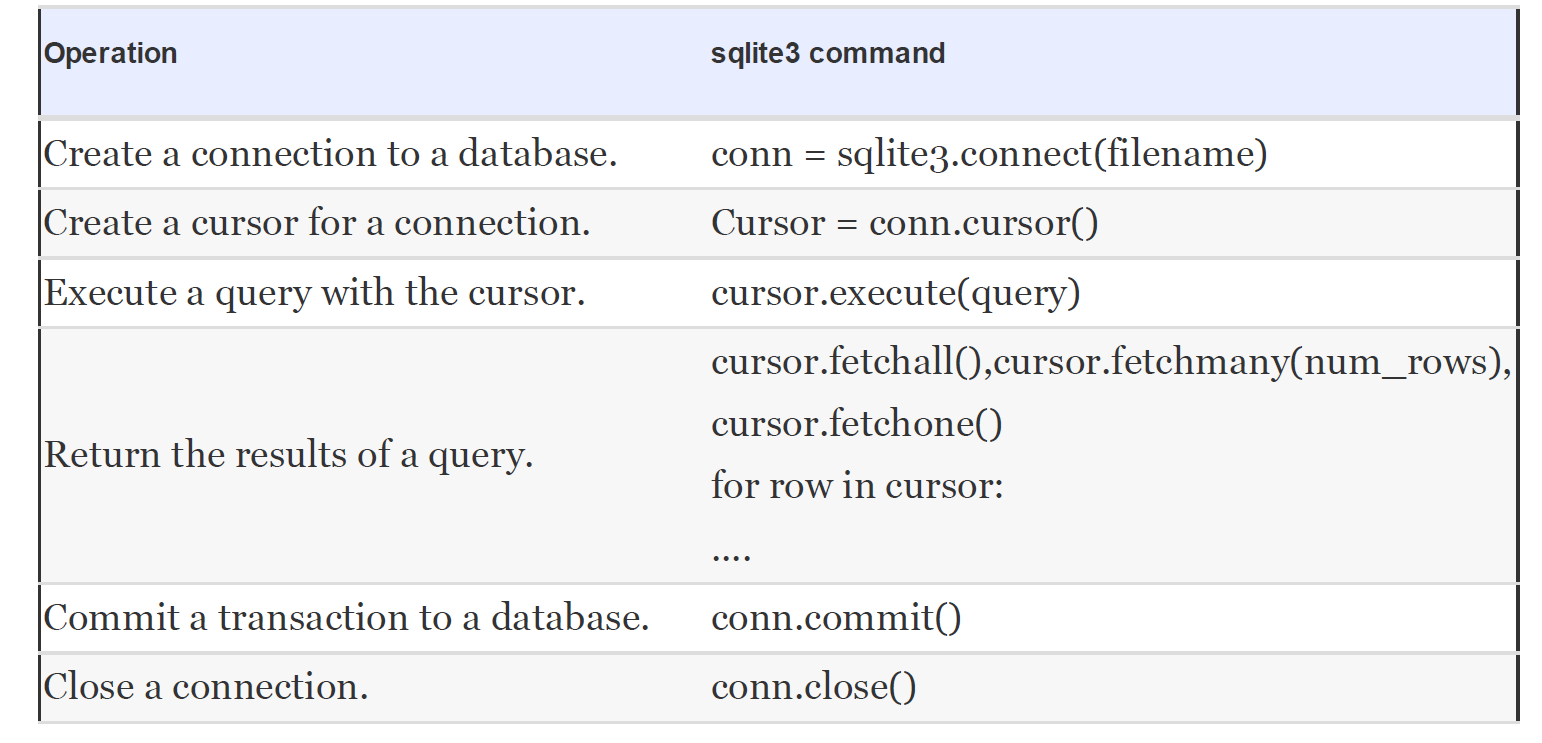

## Using MongoDB

In [ ]:
from pymongo import MongoClient
mongo = MongoClient(host='localhost', port=27017)

In [ ]:
db = mongo.my_database

In [ ]:
db = mongo['my_database']

In [ ]:
collection = db.records

In [ ]:
collection.find_one()

In [ ]:
db.list_collection_names()

In [ ]:
import datetime
a_document = {'name': 'Ahmed','age': 30,'interests': ['Python', 'ML', 'statistics'],'date_added': datetime.datetime.now()
}

In [ ]:
result = collection.insert_one(a_document)
print(result.inserted_id)

In [ ]:
db.list_collection_names()

In [ ]:
collection.find_one()

In [ ]:
from bson.objectid import ObjectId

In [ ]:
collection.find_one({"_id":ObjectId('5cb57f5673731020c0e47e5b')})

In [ ]:
collection.update_one({"_id":ObjectId('5cb57f5673731020c0e47e5b')},
{"$set": {"name":"Bilal"}})

In [ ]:
collection.find_one({"_id":ObjectId('5cb57f5673731020c0e47e5b')})

In [ ]:
collection.replace_one({"_id":ObjectId('5cb57f5673731020c0e47e5b')},
{"name":"Saleem"})

In [ ]:
collection.find_one({"_id":ObjectId('5cb57f5673731020c0e47e5b')})

In [ ]:
collection.delete_one({"_id":ObjectId('5cb57f5673731020c0e47e5b')})

In [ ]:
collection.find_one({"_id":ObjectId('5cb57f5673731020c0e47e5b')})

In [ ]:
db.collection_names()

In [ ]:
collection.drop()
db.collection_names()

In [ ]:
mongo.close()

In [ ]:
mongoClient = MongoClient('mongodb://localhost:27017')

In [ ]:
db = mongoClient.posts_db

In [ ]:
posts = db.posts_collection

In [ ]:
post_data = {
    'title': 'Python and MongoDB',
    'content': 'Learning PyMongo is fun',
    'author': 'Farhan'
}

In [ ]:
result = posts.insert_one(post_data)

In [ ]:
db.collection_names()

In [ ]:
print('One post: {}'.format(result.inserted_id))

In [ ]:
post_1 = {
    'title': 'Python and MongoDB',
    'content': 'PyMongo supports MongoDB CRUD operations',
    'author': 'Hamza'
}

post_2 = {
    'title': 'Virtual Environments',
    'content': 'Use virtual environments. They can make your life easier',
    'author': 'Umar'
}

post_3 = {
    'title': 'Learning Python',
    'content': 'Learn Python, it is easy',
    'author': 'Ahsan'
}


In [ ]:
new_result = posts.insert_many([post_1, post_2, post_3])

print('Multiple posts: {0}'.format(new_result.inserted_ids))

In [ ]:
hamzas_post = posts.find_one({'author': 'Hamza'})
print(hamzas_post)

In [ ]:
post_4 = {
    'title': 'Python Core Unit 2',
    'content': 'It contains several new topics on Python ecosystem',
    'author': 'Hamza'
}
new_result = posts.insert_one(post_4)
print(new_result.inserted_id)

In [ ]:
hamzas_posts = posts.find({'author': 'Hamza'})
print(hamzas_posts)

In [ ]:
for post in hamzas_posts:
    print(post)


### Using MongoEngine

While PyMongo is easy to use, it’s a bit too low-level for many projects. 

You’ll have to write a lot of your own code to consistently save, retrieve, and delete objects.

**MongoEngine** is a Python library that provides a higher abstraction on top of PyMongo.

* It is an object document mapper (ODM) which is roughly equivalent to a SQL-based object relational mapper (ORM)
* The abstraction provided by MongoEngine is class-based (OOP), so all of the models you create are classes
* MongoEngine is one of the better and most popular library for MongoDB and has a nice mix of features, flexibility, and community support.

In [ ]:
!pip install mongoengine

In [ ]:
from mongoengine import *
db_client = connect('mynew_db', host='localhost', port=27017)

In [ ]:
class User(Document):
    email = StringField(required=True)
    first_name = StringField(max_length=30)
    last_name = StringField(max_length=30)

In [ ]:
import datetime

class Post(Document):
    title = StringField(required=True, max_length=200)
    content = StringField(required=True)
    author =  ReferenceField(User)
    published = DateTimeField(default=datetime.datetime.now)

In [ ]:
author = User(email="hamza@xyz.com", first_name="Hamza", last_name="Farhan")
author.save()

There are quite a few more parameters like this we can set, including:

* db_field: Specify a different field name
* required: Make sure this field is set
* default: Use the given default value if no other value is given
* unique: Make sure no other document in the collection has the same value for this field
* choices: Make sure the field’s value is equal to one of the values given in an array

More into at: http://docs.mongoengine.org/guide/defining-documents.html#field-arguments

In [ ]:
post_1 = Post(
    title='Sample Post',
    content='Some engaging content',
    author=author
)
post_1.save()       # This will perform an insert

In [ ]:
print(post_1.title)
post_1.title = 'A Better Post Title'
post_1.save()       # This will perform an atomic edit on "title"
print(post_1.title)
print(post_1.author.first_name)

In [ ]:
post_2 = Post(content='Content goes here', author='Imran')
post_2.save()